## Imports

In [1]:
import pandas as pd
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=300 # dots per inch
import scipy as sp
import itertools

# Analysis of ratios
Since we expect kx, kz to be the same due to the symmetry of the structure along those two dimensions, the only direction which I will investigate is ky.

I checked if my error bars agree or not by considering the error of the difference between the two measurements. Because each measurement has an associated error, we can use error propagation to find the error of this difference.

If the difference between the two is smaller than the error of this difference then we say that these two measurements agree with eachother within their errors.

In [2]:
TC_dataframe = pd.read_csv("TC_dataframe.csv")

In [3]:
def pair_agreement(ratio_m):
    """Performs z-test on the difference between two measurements, taken from a table ratio_m.
    Inputs:
    ratio_m - the mth ratio in the dataframe"""
    # Extract TC and std dev from the ratio=0.1 dataframe
    k = ratio_m["ky"].values
    std_dev = ratio_m["ky error"].values

    # Storage for difference and error
    diff = np.zeros((len(k),len(k)))
    diff_error = np.zeros((len(k),len(k)))

    # Loop over all possible pairs (i,j) of TC, finding error
    for i in range(len(k)):
        for j in range(len(k)):
            diff[i,j] = np.abs(k[i] - k[j])
            diff_error[i,j] = np.sqrt(std_dev[i]**2 + std_dev[j]**2)

    # If the z statistic is less than 1, the errors agree with eachother
    agree = diff/diff_error <= 1

    # Find and print pairwise agreement
    for i in range(len(ratio_m)):
        agreeing_indices = np.where(agree[i])[0]
        print(f"Sample {i} agrees within 1 std dev with:", agreeing_indices)

## Quantifying the disorder
I also want a way to quantify the disorder which appears in the layering types

## Ratio = 0.1

In [4]:
ratio_01 = TC_dataframe[TC_dataframe["ratio"] == 0.1]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.1].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
4,[1 1 1 2 1 1 1 1 1 1],0.1,0.223754,0.006580,0.252259,0.009702,0.148462,0.008982,0.270540,0.012459
7,[1 1 1 1 2 1 1 1 1 1],0.1,0.232222,0.013378,0.270995,0.025646,0.148522,0.012336,0.277149,0.019158
8,[1 1 1 1 1 1 1 2 1 1],0.1,0.225729,0.009644,0.229460,0.016063,0.152229,0.010474,0.295498,0.016464
3,[1 1 1 1 1 1 2 1 1 1],0.1,0.219705,0.007439,0.275384,0.014439,0.158566,0.011620,0.225163,0.022163
9,[1 1 1 1 1 1 1 2 1 1],0.1,0.212988,0.006004,0.251585,0.015666,0.158959,0.011653,0.228419,0.018291
6,[1 1 1 1 1 1 1 1 2 1],0.1,0.214223,0.007675,0.238117,0.016462,0.164108,0.008924,0.240444,0.018906
5,[1 1 1 1 1 1 2 1 1 1],0.1,0.223305,0.009404,0.257029,0.017124,0.172475,0.014715,0.240410,0.012728
1,[1 1 1 1 2 1 1 1 1 1],0.1,0.237749,0.009441,0.255688,0.019460,0.174313,0.011858,0.283247,0.016613
2,[1 1 1 1 1 1 1 2 1 1],0.1,0.221332,0.007022,0.246119,0.014098,0.180907,0.016429,0.236969,0.012217
0,[1 2 1 1 1 1 1 1 1 1],0.1,0.251350,0.010175,0.254939,0.025972,0.210715,0.011312,0.288397,0.018703


Interesting that index 4 has the smallest TC, why might this be? Notice that indices 8,9,2 are equivalent structures. So their errors should agree with eachother.

In [5]:
pair_agreement(ratio_01)

Sample 0 agrees within 1 std dev with: [0]
Sample 1 agrees within 1 std dev with: [1 2 3 5 6 9]
Sample 2 agrees within 1 std dev with: [1 2 5 6]
Sample 3 agrees within 1 std dev with: [1 3 4 5 6 7 8 9]
Sample 4 agrees within 1 std dev with: [3 4 7 8 9]
Sample 5 agrees within 1 std dev with: [1 2 3 5 6 9]
Sample 6 agrees within 1 std dev with: [1 2 3 5 6 8 9]
Sample 7 agrees within 1 std dev with: [3 4 7 8 9]
Sample 8 agrees within 1 std dev with: [3 4 6 7 8 9]
Sample 9 agrees within 1 std dev with: [1 3 4 5 6 7 8 9]


Even though 8,9 and 2 are equivalent, we observe an agreement between 8 and 9 but neither of them agree with 2.

## Ratio = 0.2

In [6]:
ratio_02 = TC_dataframe[TC_dataframe["ratio"] == 0.2]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.2].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
12,[1 1 2 1 1 1 1 2 1 1],0.2,0.180547,0.007268,0.238966,0.014976,0.091513,0.006147,0.211160,0.010756
11,[1 1 1 2 1 1 1 1 1 2],0.2,0.179690,0.005850,0.227652,0.011949,0.101218,0.005952,0.210200,0.010018
16,[2 1 1 1 1 2 1 1 1 1],0.2,0.179344,0.009934,0.219241,0.014245,0.106615,0.011743,0.212177,0.021324
15,[1 2 1 1 2 1 1 1 1 1],0.2,0.179102,0.005298,0.208264,0.009723,0.108073,0.011763,0.220969,0.006267
18,[1 1 2 1 1 2 1 1 1 1],0.2,0.175406,0.007758,0.217697,0.011584,0.108635,0.011761,0.199886,0.012173
17,[1 1 1 1 1 2 1 2 1 1],0.2,0.199602,0.006856,0.234978,0.005697,0.117030,0.009012,0.246798,0.018988
13,[2 1 1 1 1 1 1 1 2 1],0.2,0.199029,0.006868,0.251377,0.018390,0.119064,0.008544,0.226647,0.012698
14,[1 1 1 1 2 1 2 1 1 1],0.2,0.185533,0.008322,0.193836,0.018973,0.132757,0.009480,0.230006,0.021584
19,[2 1 1 1 1 1 1 1 1 2],0.2,0.224317,0.011747,0.252130,0.023919,0.153558,0.011353,0.267263,0.021967
10,[1 2 2 1 1 1 1 1 1 1],0.2,0.215471,0.010399,0.252376,0.017707,0.164316,0.010729,0.229720,0.019155


In [7]:
pair_agreement(ratio_02)

Sample 0 agrees within 1 std dev with: [0 9]
Sample 1 agrees within 1 std dev with: [1 5 6 8]
Sample 2 agrees within 1 std dev with: [2]
Sample 3 agrees within 1 std dev with: [3 5 6 7 8]
Sample 4 agrees within 1 std dev with: [4]
Sample 5 agrees within 1 std dev with: [1 3 5 6 7 8]
Sample 6 agrees within 1 std dev with: [1 3 5 6 7 8]
Sample 7 agrees within 1 std dev with: [3 5 6 7 8]
Sample 8 agrees within 1 std dev with: [1 3 5 6 7 8]
Sample 9 agrees within 1 std dev with: [0 9]


## Ratio = 0.3

In [8]:
ratio_03 = TC_dataframe[TC_dataframe["ratio"] == 0.3]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.3].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
22,[1 1 2 2 1 1 2 1 1 1],0.3,0.151758,0.006229,0.179405,0.014678,0.080536,0.008830,0.195333,0.006611
28,[1 1 2 1 1 2 1 2 1 1],0.3,0.178479,0.006405,0.240001,0.012953,0.088388,0.006682,0.207048,0.014205
24,[2 1 1 2 1 1 1 1 1 2],0.3,0.158615,0.005048,0.176758,0.007195,0.089124,0.008311,0.209964,0.016740
25,[2 1 2 1 1 1 2 1 1 1],0.3,0.164637,0.004949,0.206974,0.011613,0.101252,0.007201,0.185685,0.009666
26,[1 1 2 1 1 2 1 1 1 2],0.3,0.163296,0.004976,0.180129,0.014205,0.101285,0.009913,0.208474,0.009809
21,[2 1 1 1 1 2 1 1 1 2],0.3,0.177404,0.005465,0.192591,0.009309,0.102855,0.005497,0.236766,0.021159
27,[1 1 2 2 1 1 1 1 1 2],0.3,0.175901,0.008016,0.224365,0.016814,0.104723,0.007191,0.198615,0.009870
20,[1 1 2 1 1 2 1 1 1 2],0.3,0.162946,0.007080,0.174251,0.007092,0.107035,0.006467,0.207552,0.017502
29,[1 2 2 1 2 1 1 1 1 1],0.3,0.190745,0.006693,0.225171,0.012733,0.108950,0.010431,0.238113,0.011593
23,[2 1 1 1 1 1 1 1 2 2],0.3,0.212227,0.009104,0.252419,0.012092,0.135678,0.005370,0.248585,0.018907


In [9]:
pair_agreement(ratio_03)

Sample 0 agrees within 1 std dev with: [0 1 5 6 7 9]
Sample 1 agrees within 1 std dev with: [0 1 5 6 7 9]
Sample 2 agrees within 1 std dev with: [2 4 8]
Sample 3 agrees within 1 std dev with: [3]
Sample 4 agrees within 1 std dev with: [2 4 6 8]
Sample 5 agrees within 1 std dev with: [0 1 5 6 7 9]
Sample 6 agrees within 1 std dev with: [0 1 4 5 6 7 9]
Sample 7 agrees within 1 std dev with: [0 1 5 6 7 9]
Sample 8 agrees within 1 std dev with: [2 4 8]
Sample 9 agrees within 1 std dev with: [0 1 5 6 7 9]


## Ratio = 0.4

In [10]:
ratio_04 = TC_dataframe[TC_dataframe["ratio"] == 0.4]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.4].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
36,[1 1 1 2 2 1 1 2 1 2],0.4,0.136303,0.004042,0.167891,0.009712,0.072298,0.005092,0.168719,0.010786
32,[1 1 2 1 1 2 2 1 1 2],0.4,0.146068,0.008561,0.180746,0.008621,0.084525,0.005264,0.172932,0.018641
30,[2 1 1 1 2 1 2 1 1 2],0.4,0.155510,0.005585,0.180880,0.010537,0.085283,0.005467,0.200366,0.014127
39,[2 1 1 1 1 2 2 1 1 2],0.4,0.158160,0.005171,0.199685,0.008473,0.087895,0.004194,0.186900,0.012338
33,[1 1 1 2 1 1 2 2 2 1],0.4,0.161665,0.008265,0.201701,0.012443,0.089013,0.008086,0.194282,0.016267
34,[2 1 2 2 1 1 2 1 1 1],0.4,0.167177,0.007722,0.225640,0.013906,0.095155,0.005883,0.180735,0.011815
38,[1 2 2 2 1 1 1 1 2 1],0.4,0.154078,0.006321,0.194895,0.012056,0.097658,0.006638,0.169680,0.007601
31,[1 2 1 2 2 1 1 2 1 1],0.4,0.157404,0.005522,0.183802,0.016202,0.101775,0.007984,0.186635,0.015988
37,[1 1 1 1 2 1 2 2 1 2],0.4,0.163850,0.007079,0.192348,0.011213,0.109212,0.009754,0.189991,0.017961
35,[2 1 2 2 2 1 1 1 1 1],0.4,0.170519,0.008715,0.189781,0.015766,0.116948,0.006433,0.204827,0.016815


In [11]:
pair_agreement(ratio_04)

Sample 0 agrees within 1 std dev with: [0 2 3 9]
Sample 1 agrees within 1 std dev with: [1 4 7 8]
Sample 2 agrees within 1 std dev with: [0 2 3 9]
Sample 3 agrees within 1 std dev with: [0 2 3 4 8 9]
Sample 4 agrees within 1 std dev with: [1 3 4 8]
Sample 5 agrees within 1 std dev with: [5 7]
Sample 6 agrees within 1 std dev with: [6]
Sample 7 agrees within 1 std dev with: [1 5 7 8]
Sample 8 agrees within 1 std dev with: [1 3 4 7 8]
Sample 9 agrees within 1 std dev with: [0 2 3 9]


## Ratio = 0.5

In [12]:
ratio_05 = TC_dataframe[TC_dataframe["ratio"] == 0.5]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.5].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
47,[1 2 1 2 1 1 2 2 2 1],0.5,0.145769,0.006485,0.184143,0.011134,0.071862,0.006721,0.181302,0.016904
40,[1 1 2 1 2 1 1 2 2 2],0.5,0.154178,0.007526,0.197931,0.009518,0.076150,0.006765,0.188453,0.011484
41,[2 1 1 1 2 2 2 1 1 2],0.5,0.145532,0.007932,0.171097,0.009526,0.090394,0.006234,0.175106,0.011866
46,[1 2 1 1 2 2 2 1 2 1],0.5,0.146684,0.008239,0.174265,0.011032,0.091588,0.007787,0.174198,0.020571
44,[1 1 2 2 2 1 2 2 1 1],0.5,0.156258,0.008173,0.189713,0.013531,0.092999,0.008607,0.186062,0.011818
49,[2 2 1 1 1 2 1 1 2 2],0.5,0.153573,0.004473,0.179873,0.014899,0.099945,0.006849,0.180901,0.012691
48,[1 2 2 1 1 1 1 2 2 2],0.5,0.173152,0.008821,0.207432,0.011453,0.111421,0.007336,0.200603,0.015656
45,[2 2 2 1 1 1 1 2 2 1],0.5,0.154614,0.007417,0.165190,0.020471,0.112483,0.005238,0.186169,0.011680
42,[2 2 1 2 1 1 1 1 2 2],0.5,0.168405,0.007511,0.185279,0.014297,0.114705,0.006337,0.205233,0.011392
43,[1 1 1 1 1 2 2 2 2 2],0.5,0.177231,0.006979,0.192368,0.014929,0.141506,0.010408,0.197818,0.008641


In [13]:
pair_agreement(ratio_05)

Sample 0 agrees within 1 std dev with: [0 7]
Sample 1 agrees within 1 std dev with: [1 4 6]
Sample 2 agrees within 1 std dev with: [2 5 8]
Sample 3 agrees within 1 std dev with: [3]
Sample 4 agrees within 1 std dev with: [1 4 6 9]
Sample 5 agrees within 1 std dev with: [2 5 8]
Sample 6 agrees within 1 std dev with: [1 4 6 9]
Sample 7 agrees within 1 std dev with: [0 7]
Sample 8 agrees within 1 std dev with: [2 5 8]
Sample 9 agrees within 1 std dev with: [4 6 9]


## Ratio = 0.6

In [14]:
ratio_06 = TC_dataframe[TC_dataframe["ratio"] == 0.6]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.6].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
59,[1 2 2 2 2 1 2 1 2 1],0.6,0.153210,0.006035,0.200771,0.013603,0.097945,0.006682,0.160914,0.010822
56,[2 2 2 1 1 2 2 1 1 2],0.6,0.157872,0.006963,0.188171,0.016600,0.098865,0.009727,0.186581,0.011840
54,[2 2 1 1 1 2 2 2 1 2],0.6,0.150037,0.004919,0.185672,0.013373,0.103198,0.004849,0.161240,0.010954
50,[2 2 2 1 1 2 2 1 1 2],0.6,0.139228,0.005523,0.168602,0.010894,0.107967,0.004607,0.141114,0.011675
53,[1 2 1 2 2 1 2 2 1 2],0.6,0.149402,0.006214,0.173756,0.012997,0.108544,0.009470,0.165905,0.007146
51,[1 1 1 2 2 2 2 1 2 2],0.6,0.152440,0.007160,0.173634,0.012619,0.113810,0.011706,0.169874,0.013015
55,[2 2 2 2 1 1 2 1 1 2],0.6,0.157053,0.008587,0.174856,0.012039,0.117605,0.007475,0.178698,0.018329
57,[1 2 2 2 2 2 2 1 1 1],0.6,0.171531,0.004440,0.207894,0.012379,0.124704,0.004923,0.181996,0.004626
58,[2 2 2 2 2 1 1 1 1 2],0.6,0.180549,0.006622,0.212816,0.012854,0.140307,0.011247,0.188524,0.012546
52,[2 2 2 2 2 2 1 1 1 1],0.6,0.177312,0.003891,0.189110,0.013554,0.142725,0.011549,0.200102,0.015410


In [15]:
pair_agreement(ratio_06)

Sample 0 agrees within 1 std dev with: [0 1 3 4 6]
Sample 1 agrees within 1 std dev with: [0 1 3 4 5 6 7]
Sample 2 agrees within 1 std dev with: [2 8]
Sample 3 agrees within 1 std dev with: [0 1 3 4 5 6 9]
Sample 4 agrees within 1 std dev with: [0 1 3 4 6 9]
Sample 5 agrees within 1 std dev with: [1 3 5 7]
Sample 6 agrees within 1 std dev with: [0 1 3 4 6 9]
Sample 7 agrees within 1 std dev with: [1 5 7]
Sample 8 agrees within 1 std dev with: [2 8]
Sample 9 agrees within 1 std dev with: [3 4 6 9]


## Ratio = 0.7

In [16]:
ratio_07 = TC_dataframe[np.isclose(TC_dataframe["ratio"], 0.7)]
# Display sorted dataframe
TC_dataframe[np.isclose(TC_dataframe["ratio"], 0.7)].sort_values("ky")

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
68,[2 2 2 2 1 2 1 2 2 1],0.7,0.151234,0.004656,0.170811,0.009665,0.100990,0.006262,0.181901,0.008852
60,[2 2 2 1 2 2 1 1 2 2],0.7,0.140688,0.008535,0.169190,0.015551,0.106146,0.008440,0.146727,0.011148
61,[2 1 2 2 2 2 1 1 2 2],0.7,0.147606,0.004050,0.179997,0.011642,0.106318,0.006777,0.156505,0.012232
69,[2 2 2 1 2 2 2 1 1 2],0.7,0.153669,0.005747,0.163562,0.012336,0.109735,0.004302,0.187710,0.013162
66,[2 2 2 2 2 1 2 2 1 1],0.7,0.153575,0.010117,0.174749,0.017803,0.111116,0.010368,0.174860,0.011292
64,[2 2 2 1 2 1 2 1 2 2],0.7,0.164332,0.006123,0.198510,0.012447,0.113365,0.008347,0.181120,0.013406
62,[2 2 1 2 1 2 2 2 1 2],0.7,0.159723,0.006668,0.196019,0.017761,0.113377,0.005011,0.169773,0.010867
65,[2 2 2 1 2 2 1 1 2 2],0.7,0.154677,0.005807,0.178523,0.015748,0.114660,0.005171,0.170847,0.008338
67,[2 2 2 2 1 1 2 2 1 2],0.7,0.156348,0.006306,0.173422,0.010181,0.118298,0.007522,0.177323,0.011148
63,[2 2 2 2 2 1 2 1 1 2],0.7,0.165888,0.007790,0.197271,0.017096,0.126868,0.007401,0.173523,0.009784


In [17]:
pair_agreement(ratio_07)

Sample 0 agrees within 1 std dev with: [0 1 2 4 5 6 8 9]
Sample 1 agrees within 1 std dev with: [0 1 2 4 5 6 8 9]
Sample 2 agrees within 1 std dev with: [0 1 2 4 5 6 7 9]
Sample 3 agrees within 1 std dev with: [3 7]
Sample 4 agrees within 1 std dev with: [0 1 2 4 5 6 7 9]
Sample 5 agrees within 1 std dev with: [0 1 2 4 5 6 7 9]
Sample 6 agrees within 1 std dev with: [0 1 2 4 5 6 7 8 9]
Sample 7 agrees within 1 std dev with: [2 3 4 5 6 7 9]
Sample 8 agrees within 1 std dev with: [0 1 6 8]
Sample 9 agrees within 1 std dev with: [0 1 2 4 5 6 7 9]


## Ratio = 0.8

In [18]:
ratio_08 = TC_dataframe[TC_dataframe["ratio"] == 0.8]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.8].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
79,[2 2 1 2 2 2 1 2 2 2],0.8,0.159002,0.007576,0.183051,0.012670,0.116347,0.009159,0.177610,0.011614
74,[2 1 2 1 2 2 2 2 2 2],0.8,0.169570,0.005298,0.197647,0.009914,0.118687,0.008013,0.192374,0.013554
72,[2 2 2 2 2 2 2 1 1 2],0.8,0.162984,0.007754,0.179434,0.014742,0.119934,0.009722,0.189585,0.017198
76,[2 2 2 2 2 1 2 1 2 2],0.8,0.151226,0.005883,0.146703,0.013289,0.126528,0.007364,0.180448,0.010057
73,[2 2 2 2 2 2 2 2 1 1],0.8,0.172161,0.007658,0.179800,0.014405,0.132679,0.010840,0.204003,0.014978
70,[2 2 1 2 1 2 2 2 2 2],0.8,0.162608,0.005093,0.175815,0.011801,0.132983,0.010240,0.179026,0.009267
78,[2 1 2 2 2 2 2 2 2 1],0.8,0.167671,0.004577,0.195975,0.009034,0.134286,0.007605,0.172751,0.014878
77,[2 2 2 2 1 2 2 2 1 2],0.8,0.160632,0.007981,0.174573,0.015629,0.135261,0.009771,0.172060,0.011534
71,[2 2 2 1 2 2 2 2 2 1],0.8,0.155127,0.006612,0.173361,0.009758,0.142632,0.008227,0.149387,0.012530
75,[1 2 2 2 1 2 2 2 2 2],0.8,0.161633,0.007584,0.165667,0.011863,0.145841,0.010366,0.173392,0.014979


In [19]:
pair_agreement(ratio_08)

Sample 0 agrees within 1 std dev with: [0 1 2 3 5 6 7 8]
Sample 1 agrees within 1 std dev with: [0 1 3 5 7 8]
Sample 2 agrees within 1 std dev with: [0 2 3 4 6 9]
Sample 3 agrees within 1 std dev with: [0 1 2 3 5 6 7 8]
Sample 4 agrees within 1 std dev with: [2 4 6 9]
Sample 5 agrees within 1 std dev with: [0 1 3 5 7 8]
Sample 6 agrees within 1 std dev with: [0 2 3 4 6 7 8 9]
Sample 7 agrees within 1 std dev with: [0 1 3 5 6 7 8]
Sample 8 agrees within 1 std dev with: [0 1 3 5 6 7 8]
Sample 9 agrees within 1 std dev with: [2 4 6 9]


## Ratio = 0.9

In [20]:
ratio_09 = TC_dataframe[TC_dataframe["ratio"] == 0.9]
# Display sorted dataframe
TC_dataframe[TC_dataframe["ratio"] == 0.9].sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
86,[2 1 2 2 2 2 2 2 2 2],0.9,0.157044,0.006044,0.184720,0.012821,0.131160,0.009567,0.155251,0.013857
83,[2 2 2 2 2 2 1 2 2 2],0.9,0.158539,0.005289,0.162732,0.009344,0.134245,0.010980,0.178640,0.014329
88,[2 2 1 2 2 2 2 2 2 2],0.9,0.155992,0.004871,0.159105,0.008738,0.137749,0.011878,0.171122,0.009975
85,[2 2 2 2 1 2 2 2 2 2],0.9,0.162505,0.005110,0.166227,0.011616,0.145631,0.007917,0.175658,0.011558
82,[1 2 2 2 2 2 2 2 2 2],0.9,0.169198,0.007932,0.181942,0.013263,0.146793,0.011467,0.178857,0.010813
87,[2 2 2 2 2 2 2 2 1 2],0.9,0.178384,0.004541,0.202163,0.011465,0.148808,0.007319,0.184181,0.009569
80,[2 2 2 2 2 2 2 2 2 1],0.9,0.168736,0.006078,0.185034,0.013377,0.149132,0.010728,0.172041,0.007708
81,[2 2 2 2 2 1 2 2 2 2],0.9,0.166266,0.006654,0.185446,0.014967,0.152928,0.012575,0.160423,0.011300
84,[2 2 2 2 2 2 2 2 2 1],0.9,0.184090,0.008142,0.182327,0.009089,0.160426,0.011113,0.209518,0.011946
89,[2 2 2 2 2 2 2 2 1 2],0.9,0.171015,0.006783,0.172589,0.012933,0.167563,0.010857,0.172894,0.011944


In [21]:
pair_agreement(ratio_09)

Sample 0 agrees within 1 std dev with: [0 1 2 3 4 5 7 8]
Sample 1 agrees within 1 std dev with: [0 1 2 4 5 7 8 9]
Sample 2 agrees within 1 std dev with: [0 1 2 3 4 5 7 8]
Sample 3 agrees within 1 std dev with: [0 2 3 5 6 8]
Sample 4 agrees within 1 std dev with: [0 1 2 4 7 9]
Sample 5 agrees within 1 std dev with: [0 1 2 3 5 7 8]
Sample 6 agrees within 1 std dev with: [3 6 8]
Sample 7 agrees within 1 std dev with: [0 1 2 4 5 7 8]
Sample 8 agrees within 1 std dev with: [0 1 2 3 5 6 7 8]
Sample 9 agrees within 1 std dev with: [1 4 9]


## Sorted by smallest $\kappa_y$

In [22]:
TC_dataframe.sort_values(("ky"))

,layer_types,ratio,k,k error,kx,kx error,ky,ky error,kz,kz error
47,[1 2 1 2 1 1 2 2 2 1],0.5,0.145769,0.006485,0.184143,0.011134,0.071862,0.006721,0.181302,0.016904
36,[1 1 1 2 2 1 1 2 1 2],0.4,0.136303,0.004042,0.167891,0.009712,0.072298,0.005092,0.168719,0.010786
40,[1 1 2 1 2 1 1 2 2 2],0.5,0.154178,0.007526,0.197931,0.009518,0.076150,0.006765,0.188453,0.011484
22,[1 1 2 2 1 1 2 1 1 1],0.3,0.151758,0.006229,0.179405,0.014678,0.080536,0.008830,0.195333,0.006611
32,[1 1 2 1 1 2 2 1 1 2],0.4,0.146068,0.008561,0.180746,0.008621,0.084525,0.005264,0.172932,0.018641
...,...,...,...,...,...,...,...,...,...,...
89,[2 2 2 2 2 2 2 2 1 2],0.9,0.171015,0.006783,0.172589,0.012933,0.167563,0.010857,0.172894,0.011944
5,[1 1 1 1 1 1 2 1 1 1],0.1,0.223305,0.009404,0.257029,0.017124,0.172475,0.014715,0.240410,0.012728
1,[1 1 1 1 2 1 1 1 1 1],0.1,0.237749,0.009441,0.255688,0.019460,0.174313,0.011858,0.283247,0.016613
2,[1 1 1 1 1 1 1 2 1 1],0.1,0.221332,0.007022,0.246119,0.014098,0.180907,0.016429,0.236969,0.012217


### Errors 

In [23]:
mass1 = 39.948; mass2 = 100.0
ratios = np.arange(0.1,1,0.1)

avg_masses = (mass1*(1-ratios) + mass2*ratios)

In [24]:
# Group TC dataframe into ratios, this will make it easier to work with
grouped = TC_dataframe.groupby("ratio")

# Under the grouped dataframe, find mean and std dev amongst each ratio, treating each random structure as a sample under that ratio.
# This means that the standard deviation we find for this sample is taken to be the std dev of the population for that ratio (the MLE)
k_stats = grouped.agg(k_mean  = ("k",  "mean"), k_std   = ("k",  "std"),
    kx_mean = ("kx", "mean"), kx_std  = ("kx", "std"),
    ky_mean = ("ky", "mean"), ky_std  = ("ky", "std"),
    kz_mean = ("kz", "mean"), kz_std  = ("kz", "std"),)

# We use the formula for the std dev of the sample mean, treating the random structure as a sample under a ratio
# VarX = sigma^2/N where N is the size of sample and sigma^2 is the variance of the population
k_stats["k_err"]  = k_stats["k_std"]  / np.sqrt( grouped.size() )
k_stats["kx_err"] = k_stats["kx_std"] / np.sqrt( grouped.size() )
k_stats["ky_err"] = k_stats["ky_std"] / np.sqrt( grouped.size() )
k_stats["kz_err"] = k_stats["kz_std"] / np.sqrt( grouped.size() )


k_stats = k_stats.reset_index().sort_values("ratio")

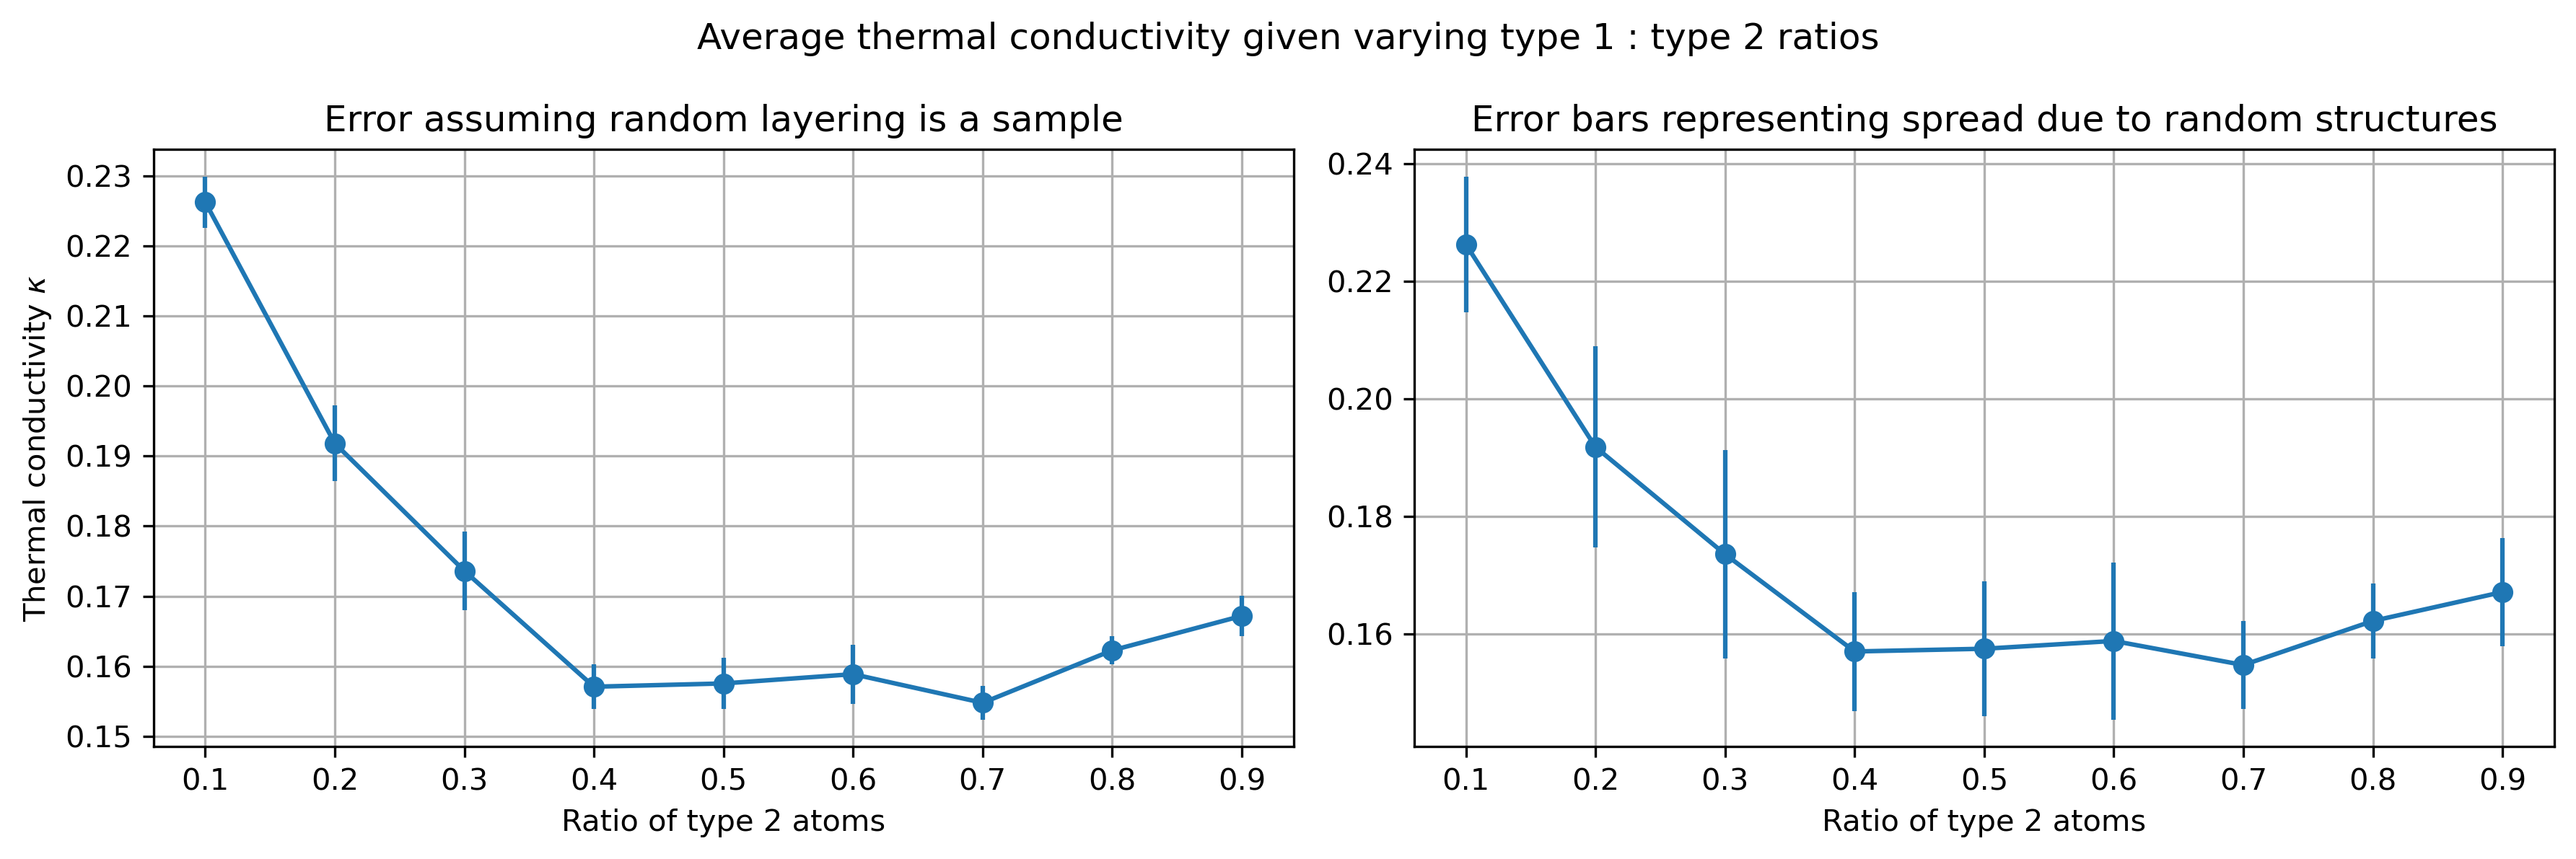

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left plot assumes the random structures are samples of each ratio
axes[0].errorbar(k_stats["ratio"], k_stats["k_mean"], yerr=k_stats["k_err"], fmt='-o')
axes[0].set_xlabel("Ratio of type 2 atoms"); axes[0].set_ylabel("Thermal conductivity $\kappa$")
axes[0].set_title("Error assuming random layering is a sample")
axes[0].grid()

# Right plot plots error bars as just the spread due to the random structure
axes[1].errorbar(k_stats["ratio"], k_stats["k_mean"], yerr=k_stats["k_std"], fmt='-o')
axes[1].set_xlabel("Ratio of type 2 atoms")
axes[1].set_title("Error bars representing spread due to random structures")
axes[1].grid()

plt.suptitle("Average thermal conductivity given varying type 1 : type 2 ratios")
plt.tight_layout()

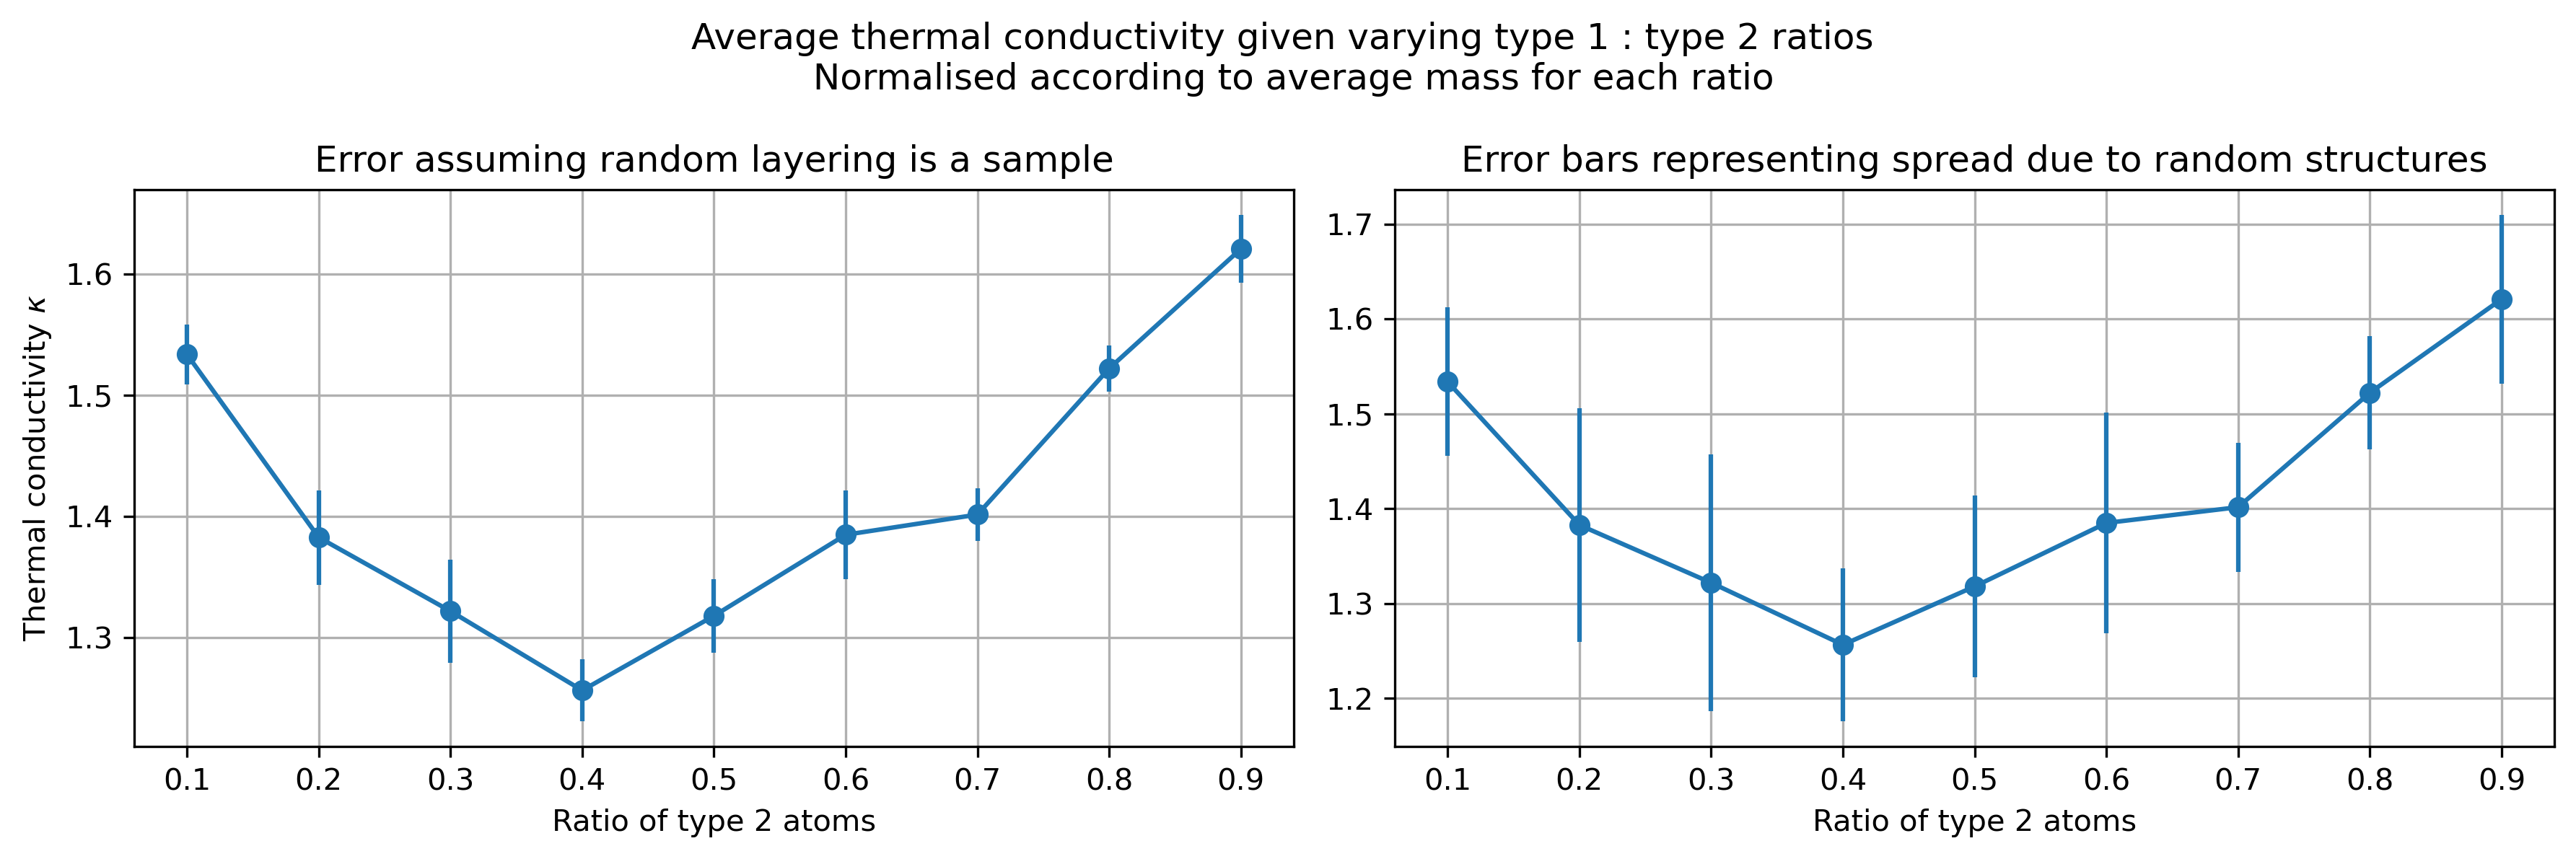

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left plot assumes the random structures are samples of each ratio
axes[0].errorbar(k_stats["ratio"], k_stats["k_mean"]*np.sqrt(avg_masses), yerr=k_stats["k_err"]*np.sqrt(avg_masses), fmt='-o')
axes[0].set_xlabel("Ratio of type 2 atoms"); axes[0].set_ylabel("Thermal conductivity $\kappa$")
axes[0].set_title("Error assuming random layering is a sample")
axes[0].grid()

# Right plot plots error bars as just the spread due to the random structure
axes[1].errorbar(k_stats["ratio"], k_stats["k_mean"]*np.sqrt(avg_masses), yerr=k_stats["k_std"]*np.sqrt(avg_masses), fmt='-o')
axes[1].set_xlabel("Ratio of type 2 atoms")
axes[1].set_title("Error bars representing spread due to random structures")
axes[1].grid()

plt.suptitle("Average thermal conductivity given varying type 1 : type 2 ratios \n Normalised according to average mass for each ratio")
plt.tight_layout()

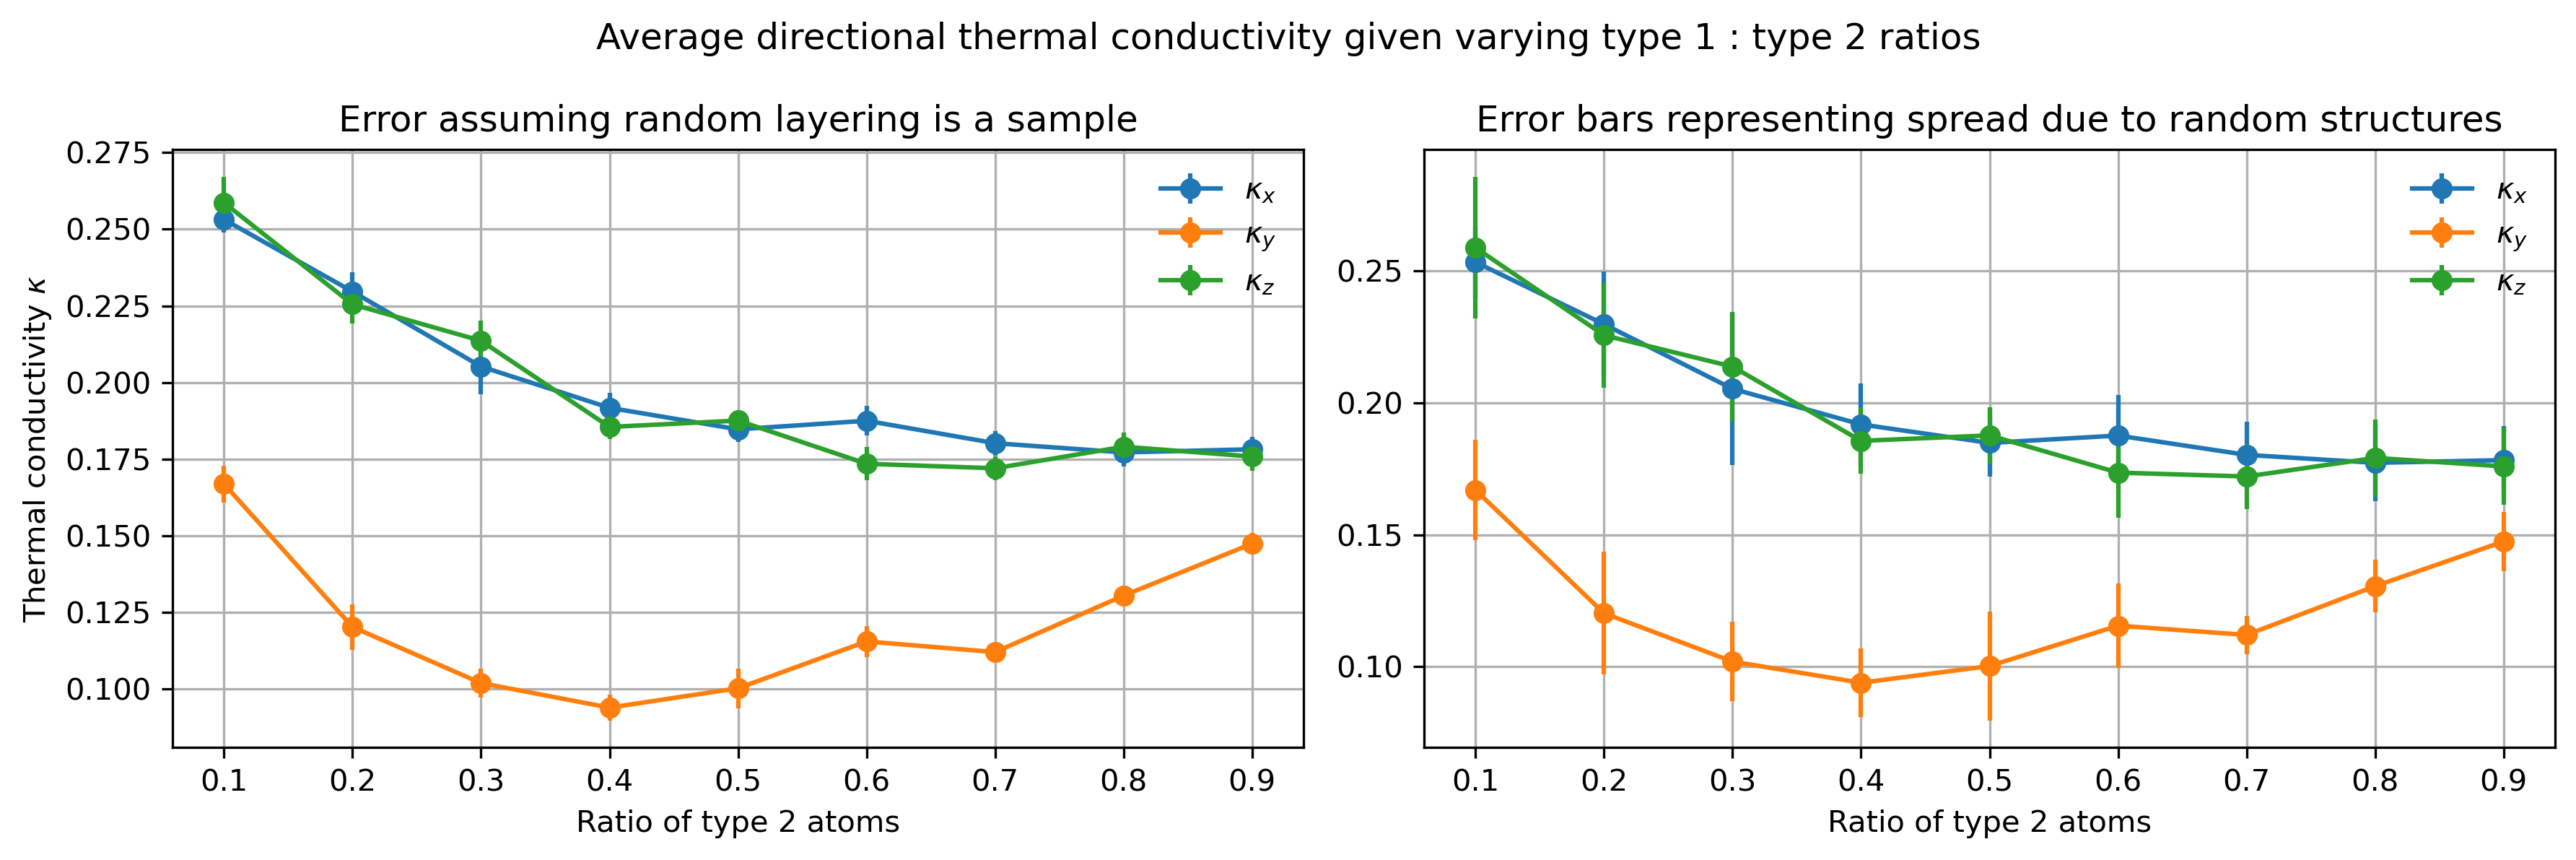

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].errorbar(k_stats["ratio"],k_stats["kx_mean"],yerr=k_stats["kx_err"], fmt='o-', label="$\kappa_x$")
axes[0].errorbar(k_stats["ratio"],k_stats["ky_mean"],yerr=k_stats["ky_err"], fmt='o-', label="$\kappa_y$")
axes[0].errorbar(k_stats["ratio"],k_stats["kz_mean"],yerr=k_stats["kz_err"], fmt='o-', label="$\kappa_z$")
#axes[0].plot(ratios, 1.75/np.sqrt(avg_masses), label="1/sqrt(average mass)")
axes[0].set_xlabel("Ratio of type 2 atoms"); axes[0].set_ylabel("Thermal conductivity $\kappa$")
axes[0].set_title("Error assuming random layering is a sample")
axes[0].grid(); axes[0].legend()

axes[1].errorbar(k_stats["ratio"],k_stats["kx_mean"],yerr=k_stats["kx_std"], fmt='o-', label="$\kappa_x$")
axes[1].errorbar(k_stats["ratio"],k_stats["ky_mean"],yerr=k_stats["ky_std"], fmt='o-', label="$\kappa_y$")
axes[1].errorbar(k_stats["ratio"],k_stats["kz_mean"],yerr=k_stats["kz_std"], fmt='o-', label="$\kappa_z$")
#axes[1].plot(ratios, 1.75/np.sqrt(avg_masses), label="1/sqrt(average mass)")
axes[1].set_xlabel("Ratio of type 2 atoms")
axes[1].set_title("Error bars representing spread due to random structures")
axes[1].grid(); axes[1].legend()

plt.suptitle("Average directional thermal conductivity given varying type 1 : type 2 ratios")
plt.tight_layout()

In [39]:
def sqrtm(m, a):
    """Only one parameter a is used, otherwise we would be overparametrising the problem
    This is unsurprising as a second parameter b which was a y-offset was fit at just -0.003"""
    return a/np.sqrt(m)

def funcm(m, a, b, c):
    return a*(m**b) + c

def goodness_of_fit(x, y, error, popt, model):
    residual = (y - model(x, *popt)) / error
    chi2 = np.sum(residual**2)
    dof = len(y) - len(popt)
    chi2_red = chi2/dof
    p = 1 - stats.chi2.cdf(chi2, dof)
    return chi2_red, p

Matrix condition number: 1.0
Reduced chi^2 statistic: 3.5489889181510583, with p value 0.00040518910098807925


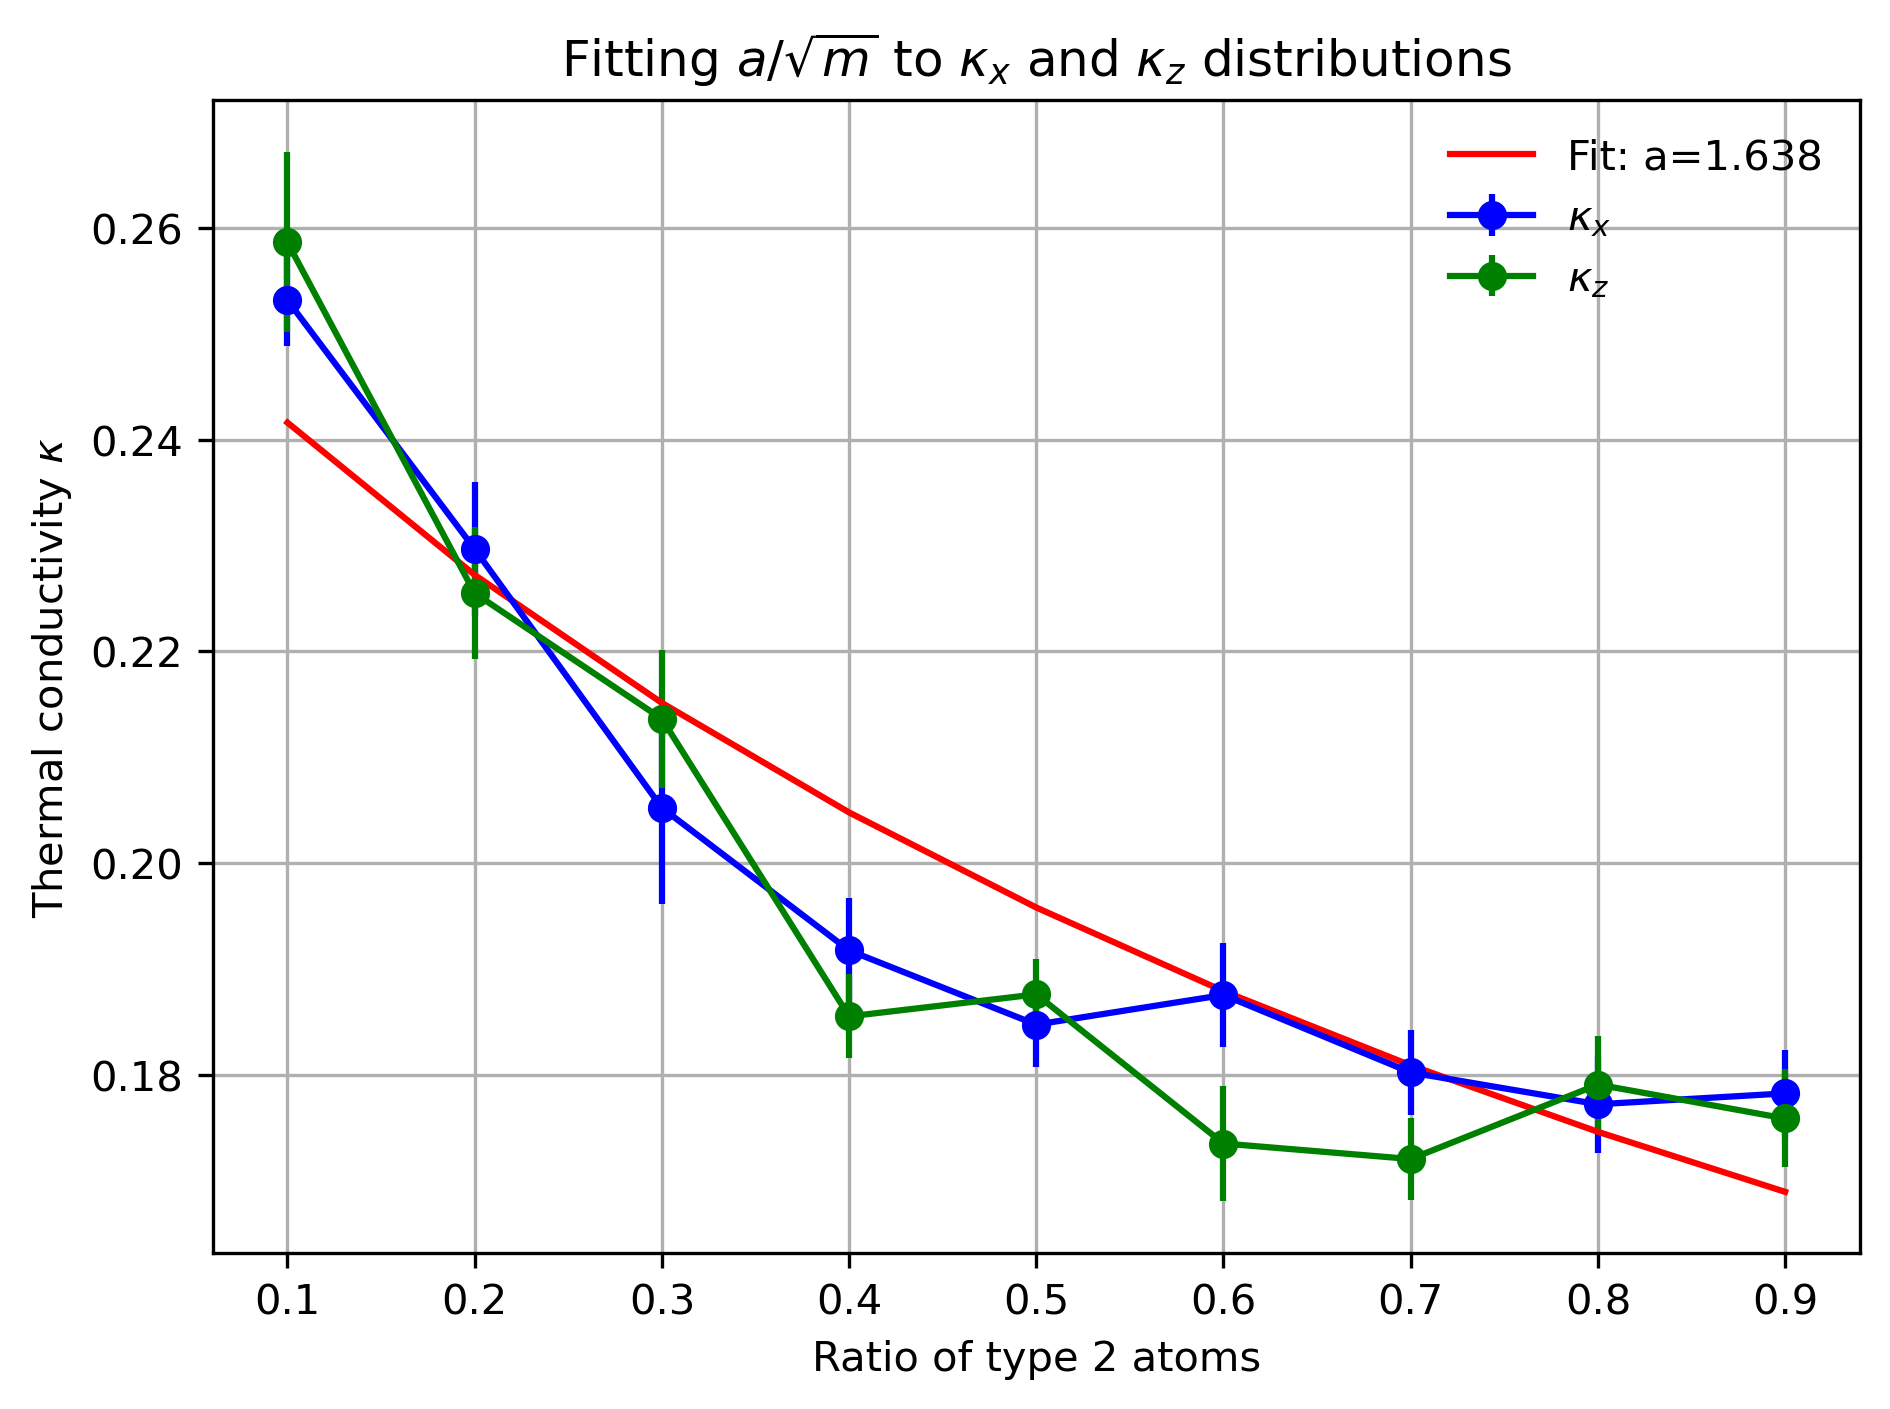

In [29]:
from scipy.optimize import curve_fit
from scipy import stats
popt, pcov = curve_fit(sqrtm, avg_masses, k_stats["kx_mean"], sigma=k_stats["kx_err"], absolute_sigma=True)
plt.errorbar(k_stats["ratio"], k_stats["kx_mean"], yerr=k_stats["kx_err"], fmt='bo-', label="$\kappa_x$")
plt.errorbar(k_stats["ratio"], k_stats["kz_mean"], yerr=k_stats["kz_err"], fmt='go-', label="$\kappa_z$")
plt.plot(k_stats["ratio"], sqrtm(avg_masses, *popt), 'r-',
         label='Fit: a=%5.3f' % tuple(popt))
plt.xlabel("Ratio of type 2 atoms"); plt.ylabel("Thermal conductivity $\kappa$")
plt.title(r"Fitting $a / \sqrt{m}$ to $\kappa_x$ and $\kappa_z$ distributions"); plt.legend(); plt.grid(); plt.tight_layout()

print(f"Matrix condition number: {np.linalg.cond(pcov)}")
chi2_red, p = goodness_of_fit(avg_masses, k_stats["kx_mean"], k_stats["kx_err"], popt, sqrtm)
print(f"Reduced chi^2 statistic: {chi2_red}, with p value {p}")

Matrix condition number: 1.0
Reduced chi^2 statistic: 0.3548988918151056, with p value 0.9440401073355031


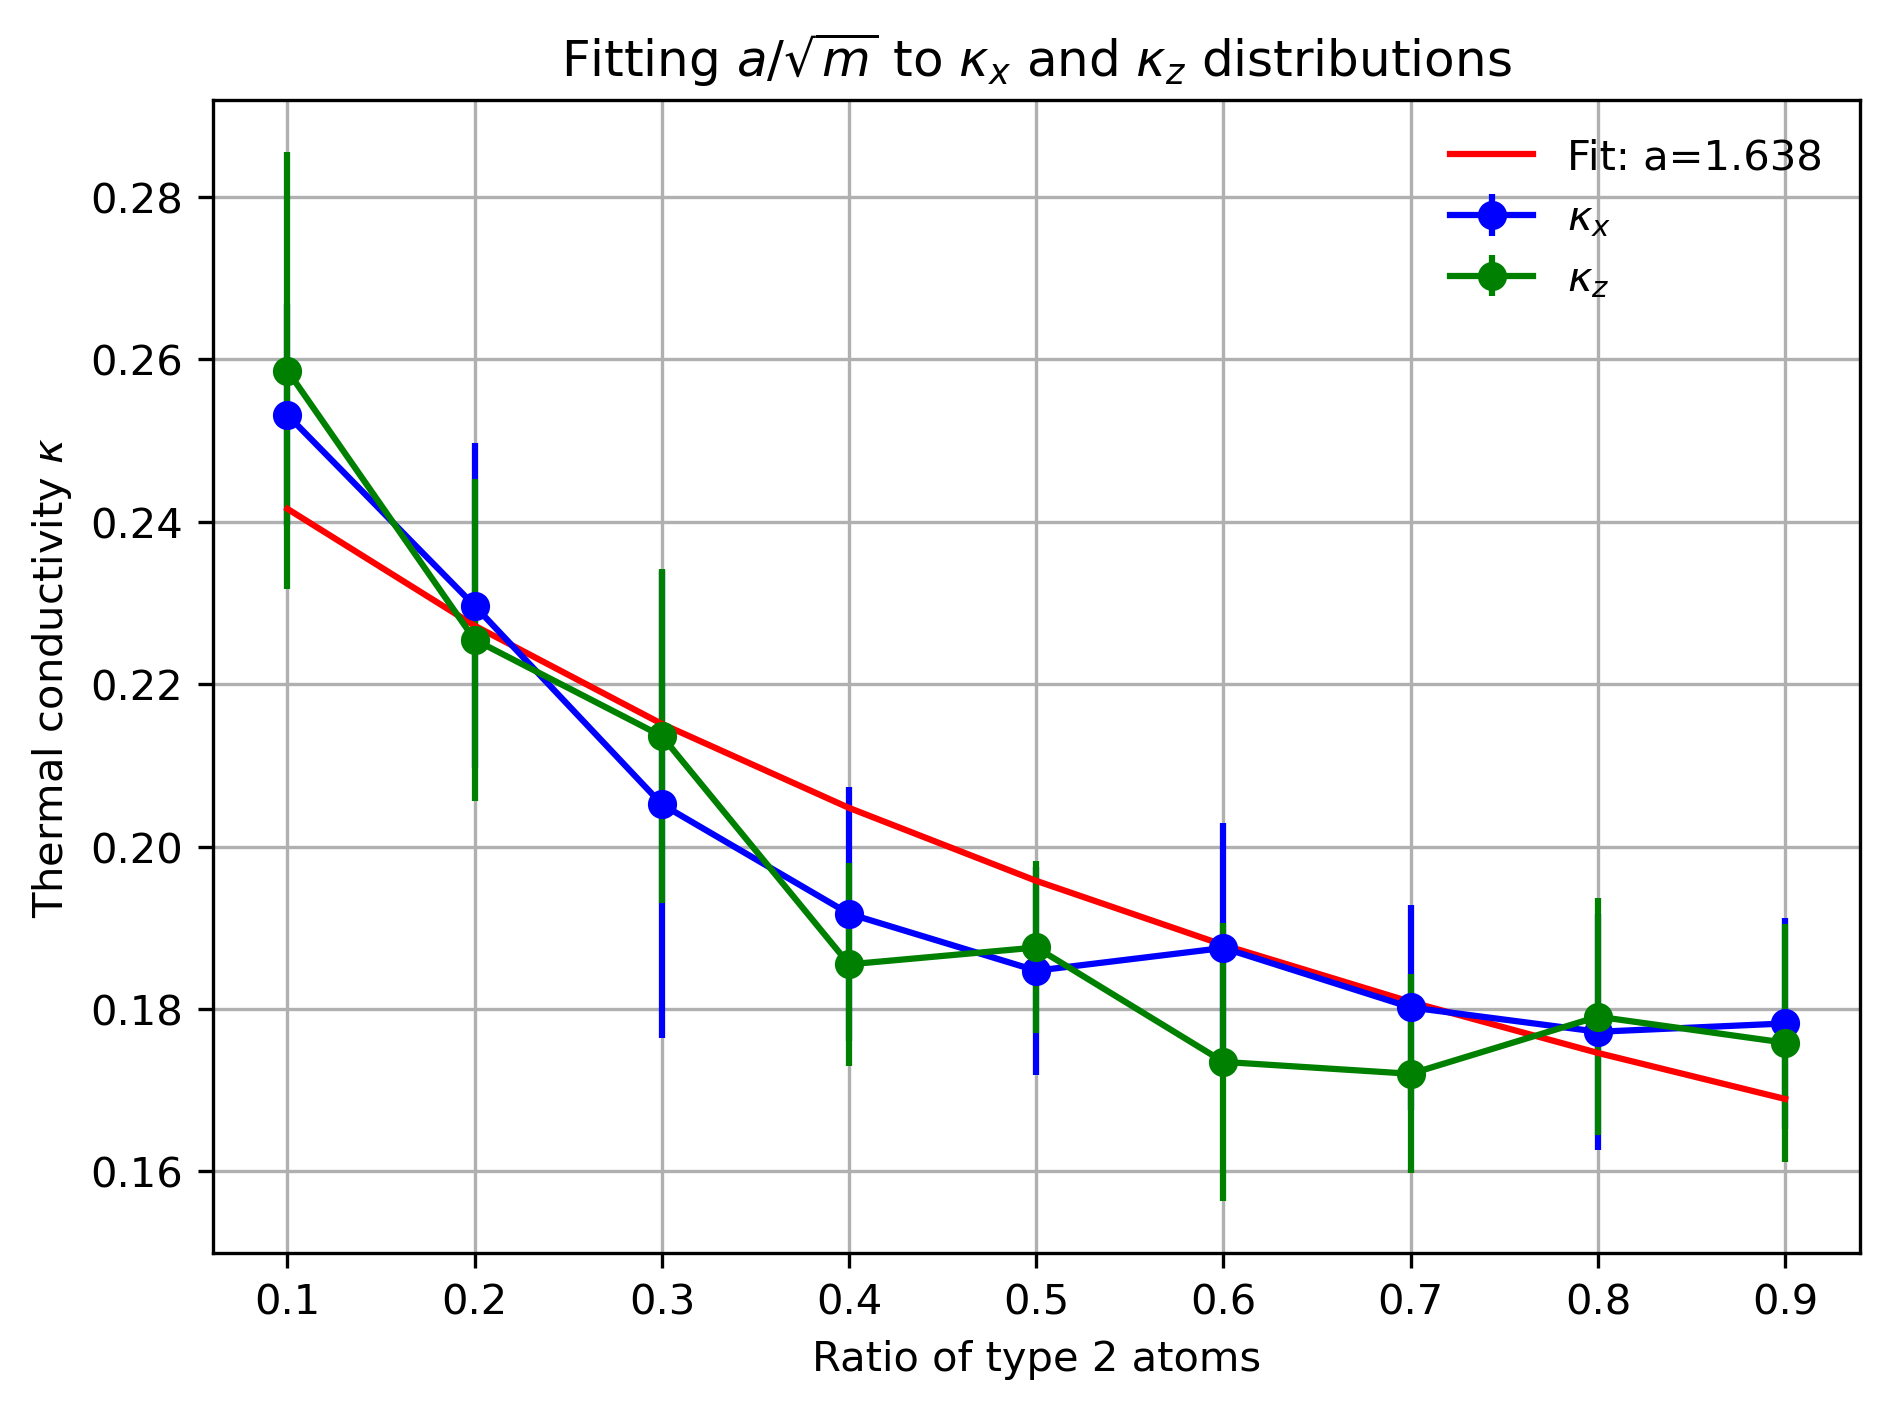

In [30]:
from scipy.optimize import curve_fit
from scipy import stats
popt, pcov = curve_fit(sqrtm, avg_masses, k_stats["kx_mean"], sigma=k_stats["kx_std"], absolute_sigma=True)
plt.errorbar(k_stats["ratio"], k_stats["kx_mean"], yerr=k_stats["kx_std"], fmt='bo-', label="$\kappa_x$")
plt.errorbar(k_stats["ratio"], k_stats["kz_mean"], yerr=k_stats["kz_std"], fmt='go-', label="$\kappa_z$")
plt.plot(k_stats["ratio"], sqrtm(avg_masses, *popt), 'r-',
         label='Fit: a=%5.3f' % tuple(popt))
plt.xlabel("Ratio of type 2 atoms"); plt.ylabel("Thermal conductivity $\kappa$")
plt.title(r"Fitting $a / \sqrt{m}$ to $\kappa_x$ and $\kappa_z$ distributions"); plt.legend(); plt.grid(); plt.tight_layout()

print(f"Matrix condition number: {np.linalg.cond(pcov)}")
chi2_red, p = goodness_of_fit(avg_masses, k_stats["kx_mean"], k_stats["kx_std"], popt, sqrtm)
print(f"Reduced chi^2 statistic: {chi2_red}, with p value {p}")

There is considerable evidence that $\kappa_x$ and $\kappa_z$ do not follow a relationship inversely prop to $\sqrt{m}$

## No random layering, but follows 1/sqrtm dependence: monoatomic investigation

In [31]:
def extract_TC(file_path):
    """Extracts the thermal conductivity (TC) value from the logfile,
    assuming that the LAMMPS script has already been run.
    Also takes their thermal conductivities
    
    Inputs:
    file_path - path to the logfile we want to read
    
    Outputs:
    thermal_conductivity - thermal conductivity extracted from the logfile (if it is there)
    k_x - thermal conductivity along the x direction extracted from logfile
    k_y - thermal conductivity along the y direction extracted from logfile
    k_z - thermal conductivity along the z direction extracted from logfile
    """
    
    # Open file in Python to read all lines
    with open(file_path, 'r') as file:
        content = file.read()

    # Looks for lines of the form {average conductivity: X[W/mk] @ 70 K, Y /A\^3}
    k_pattern = re.compile(r'average conductivity:\s*([\d.]+)\s*\[W/mK\]', re.IGNORECASE)
    # Search logfile for that line
    k_lines = k_pattern.findall(content)
    
    # If the line exists, extract thermal conductivity. Inform user if otherwise
    if len(k_lines)>0:
        thermal_conductivity = float(k_lines[0])
    else:
        return 'Thermal conductivity not found for this file'
    
    # Look for lines of the form {diretional thermal conductivites: k_x = kx, k_y = ky, k_z = kz}
    ki_pattern = re.compile(
        r'Directional thermal conductivities:\s*'
        r'k_x\s*=\s*(?P<kx>[+-]?\d*\.?\d+(?:[eE][+-]?\d+)?)\s*,\s*'
        r'k_y\s*=\s*(?P<ky>[+-]?\d*\.?\d+(?:[eE][+-]?\d+)?)\s*,\s*'
        r'k_z\s*=\s*(?P<kz>[+-]?\d*\.?\d+(?:[eE][+-]?\d+)?)',
        re.IGNORECASE)
    
    # If the line exists, extract directional conductivity. Inform user if otherwise
    ki_lines = ki_pattern.findall(content)
    if ki_lines:
        kx_str, ky_str, kz_str = ki_lines[0]
        kx = float(kx_str)
        ky = float(ky_str)
        kz = float(kz_str)
    else:
        return 'Directional thermal conductivites not found for this file'
    
    return thermal_conductivity, kx, ky, kz

def update_seed(file_path, new_seed):
    """Updates the seed for the velocity initialisation command in the LAMMPS input script.
    The velocity in LAMMPS is randomly initialised using a given seed.
    
    Inputs:
    file_path - path to the LAMMPS script which will be updated
    new_seed - new seed to be used in velocity initialisation
    
    Outputs:
    Updated file, if amendments have been made"""
    
    # Looks for lines of the form {variable r equal X}
    pattern = re.compile(r'^\s*variable\s+r\s*equal\s*[\d.]+\s*$')
    
    # Open the file in read mode to read all lines
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Open the file in write mode to update the lines iteratively
    with open(file_path, 'w') as file:
        for line in lines:
            # If the pattern exists, update the line with the new seed in place
            if pattern.match(line):
                line = f"variable r equal {new_seed}\n"
            
            # Write the line to the file
            file.write(line)
            
def update_masses(file_path, new_mass1):
    """Updates the mass1 and mass2 variables in the LAMMPS input script.
    This assumes of course that the LAMMPS script concerns two fundamental atoms.
    
    Inputs:
    file_path - path to the LAMMPS script which will be updated
    new_mass1 - new mass 1 (g/mol)
    new_mass2 - new mass 2 (g/mol)
    
    Outputs:
    Updated file, if any amendments have been made"""
    
    # Looks for lines of the form {mass    1 X} and {mass    2 Y}
    target_pattern_mass1 = re.compile(r'^\s*mass\s+1\s+[\d.]+\s*$')
    
    # Open the file in read mode to read all lines
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Open the file in write mode to update the lines iteratively
    with open(file_path, 'w') as file:
        for line in lines:
            # --- Mass 1 ---
            # If the pattern exists, replace mass 1 with new_mass1
            if target_pattern_mass1.match(line):
                line = f"mass 1 {new_mass1}\n"
            file.write(line)
            
def update_dimensionality(file_path, new_dimension):
    """Updates the dimensionality written in the LAMMPS input script.
    
    Inputs:
    file_path - path to the LAMMPS script which will be updated
    
    Outputs:
    Updated file, if any amendments have been made"""
    
    # Look for lines of the form {dimension X}
    pattern = re.compile(r'^\s*dimension\s+(\d+)\b(?=\s*(?:#|$))')
    
    # Open the file in read mode to read all lines
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Open the file in write mode to update the lines iteratively
    with open(file_path, 'w') as file:
        # Update any line which matches line pattern
        for line in lines:
            if pattern.match(line):
                line = f"dimension {new_dimension}\n"
            
            file.write(line)
            
def run_bash():
    """ I want to describe this better """
    !bash {'lammps.sh'}
    return
def generate_FCC(Ncells, Nlayers, spacings):
    """Creates a face-centered cubic (FCC) structure.
    This specific function assumes one type of atom only.
    
    Inputs:
    Ncells - number of cells as a two-dimensional NumPy vector [Nx, Nz]
    Nlayers - number of layers along y (integer)
    spacings - lattice constant / spacing between cells
    
    Outputs:
    positions - two-dimensional NumPy array of positions [x,y,z] per atom
    type_atoms - one-dimensional NumPy array labelling atom types as integers"""
    # Create storage arrays
    positions = []
    atom_types = []

    # Extract spacing and cells
    x_spacing, y_spacing, z_spacing = spacings
    Ncells_x, Ncells_z = Ncells

    # Determine Cartesian range of atoms
    x_range, z_range = range(2*Ncells_x), range(2*Ncells_z) 
    y_range = range(0, 2*Nlayers)

    # Loop over the range of x,y,z
    for x,y,z in itertools.product(x_range, y_range, z_range):
        # Check the first layer:
        if y%2 == 0:
            # Check if x+z is even
            if (x+z)%2 == 0:
                x, z = x*0.5*x_spacing, z*0.5*z_spacing
                y = (y//2)*y_spacing
                # Append positions and types
                positions.append([x,y,z])
                atom_types.append(int(1))
                
        # Check the second layer
        elif y%2 == 1:
            # Check if x+z is odd
            if (x+z)%2 == 1:
                x, z = x*0.5*x_spacing, z*0.5*z_spacing
                y = (y//2 + 0.5)*y_spacing
                # Append positions and types
                positions.append([x,y,z])
                atom_types.append(int(1))
                                    
    # Convert lists to arrays for plotting & return
    positions = np.array(positions)
    atom_types = np.array(atom_types)
    
    return positions, atom_types

def layered_datafile_creation(Ncells, Nlayers, spacings):
    """Creates a datafile of an arbitrary crystallographic material which is LAMMPS compatible.
    Uses the generate_FCC function to generate FCC lattice.
    See the markdown above where this function is defined for details on the datafile structure.
    Alternativiely, view the eim example in LAMMPS.
    
    Inputs:
    
    Output:
    datafile.txt - datafile in LAMMPS format defining the structure"""

    # Find positions, types, IDs and group into data
    positions, atom_types = generate_FCC(Ncells, Nlayers, spacings)
    num_atoms = len(atom_types)
    IDs = np.array(range(1, num_atoms+1))
    data = np.column_stack((IDs, atom_types, positions))

    # Will take the form [ID] [Type] [X1] [Y1] [Z1] column-repeated many times
    np.savetxt('datafile.txt', data, fmt = '%i %i %s %s %s',header = 
f'''# Title

{len(data)} atoms

{len(np.unique(data[:,1]))} atom types

{min(positions[:,0])} {max(positions[:,0]) + 0.5*spacings[0]} xlo xhi
{min(positions[:,1])} {max(positions[:,1]) + 0.5*spacings[1]} ylo yhi
{min(positions[:,2])} {max(positions[:,2]) + 0.5*spacings[2]} zlo zhi

Atoms
''', comments = '')
    
    return

In [32]:
Ncells = np.array([5,5])
spacings = np.array([5.376,5.376,5.376])

# Setup array storage
k_averages, k_errors = [], []
kx_averages, kx_errors = [], []
ky_averages, ky_errors = [], []
kz_averages, kz_errors = [], []

# Loop over increasing layers
for avg_mass in tqdm(avg_masses):
    update_masses("tc.txt", avg_mass)
    # Create datafile for LAMMPS to use
    layered_datafile_creation(Ncells, 5, spacings)
    # Update seeds
    seeds = np.random.randint(1,10000,10)
    # Thermal conductivites per layer
    k_run, kx_run, ky_run, kz_run = [], [], [], []
    # Loop over seeds
    for seed in seeds:
        update_seed("tc.txt", seed)
        run_bash()
        # Extract TC and directional TC
        k_seed, kx_seed, ky_seed, kz_seed = extract_TC("log.lammps")
        # Store all seed TC's
        k_run.append(k_seed)
        kx_run.append(kx_seed)
        ky_run.append(ky_seed)
        kz_run.append(kz_seed)
    # Find all TC averages per layer
    k_averages.append(np.mean(k_run))
    kx_averages.append(np.mean(kx_run))
    ky_averages.append(np.mean(ky_run))
    kz_averages.append(np.mean(kz_run))
    # Also find their errors
    k_errors.append(np.std(k_run, ddof=1) / np.sqrt(len(k_run)))
    kx_errors.append(np.std(kx_run, ddof=1) / np.sqrt(len(kx_run)))
    ky_errors.append(np.std(ky_run, ddof=1) / np.sqrt(len(ky_run)))
    kz_errors.append(np.std(kz_run, ddof=1) / np.sqrt(len(kz_run)))

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [45:26<00:00, 302.99s/it]


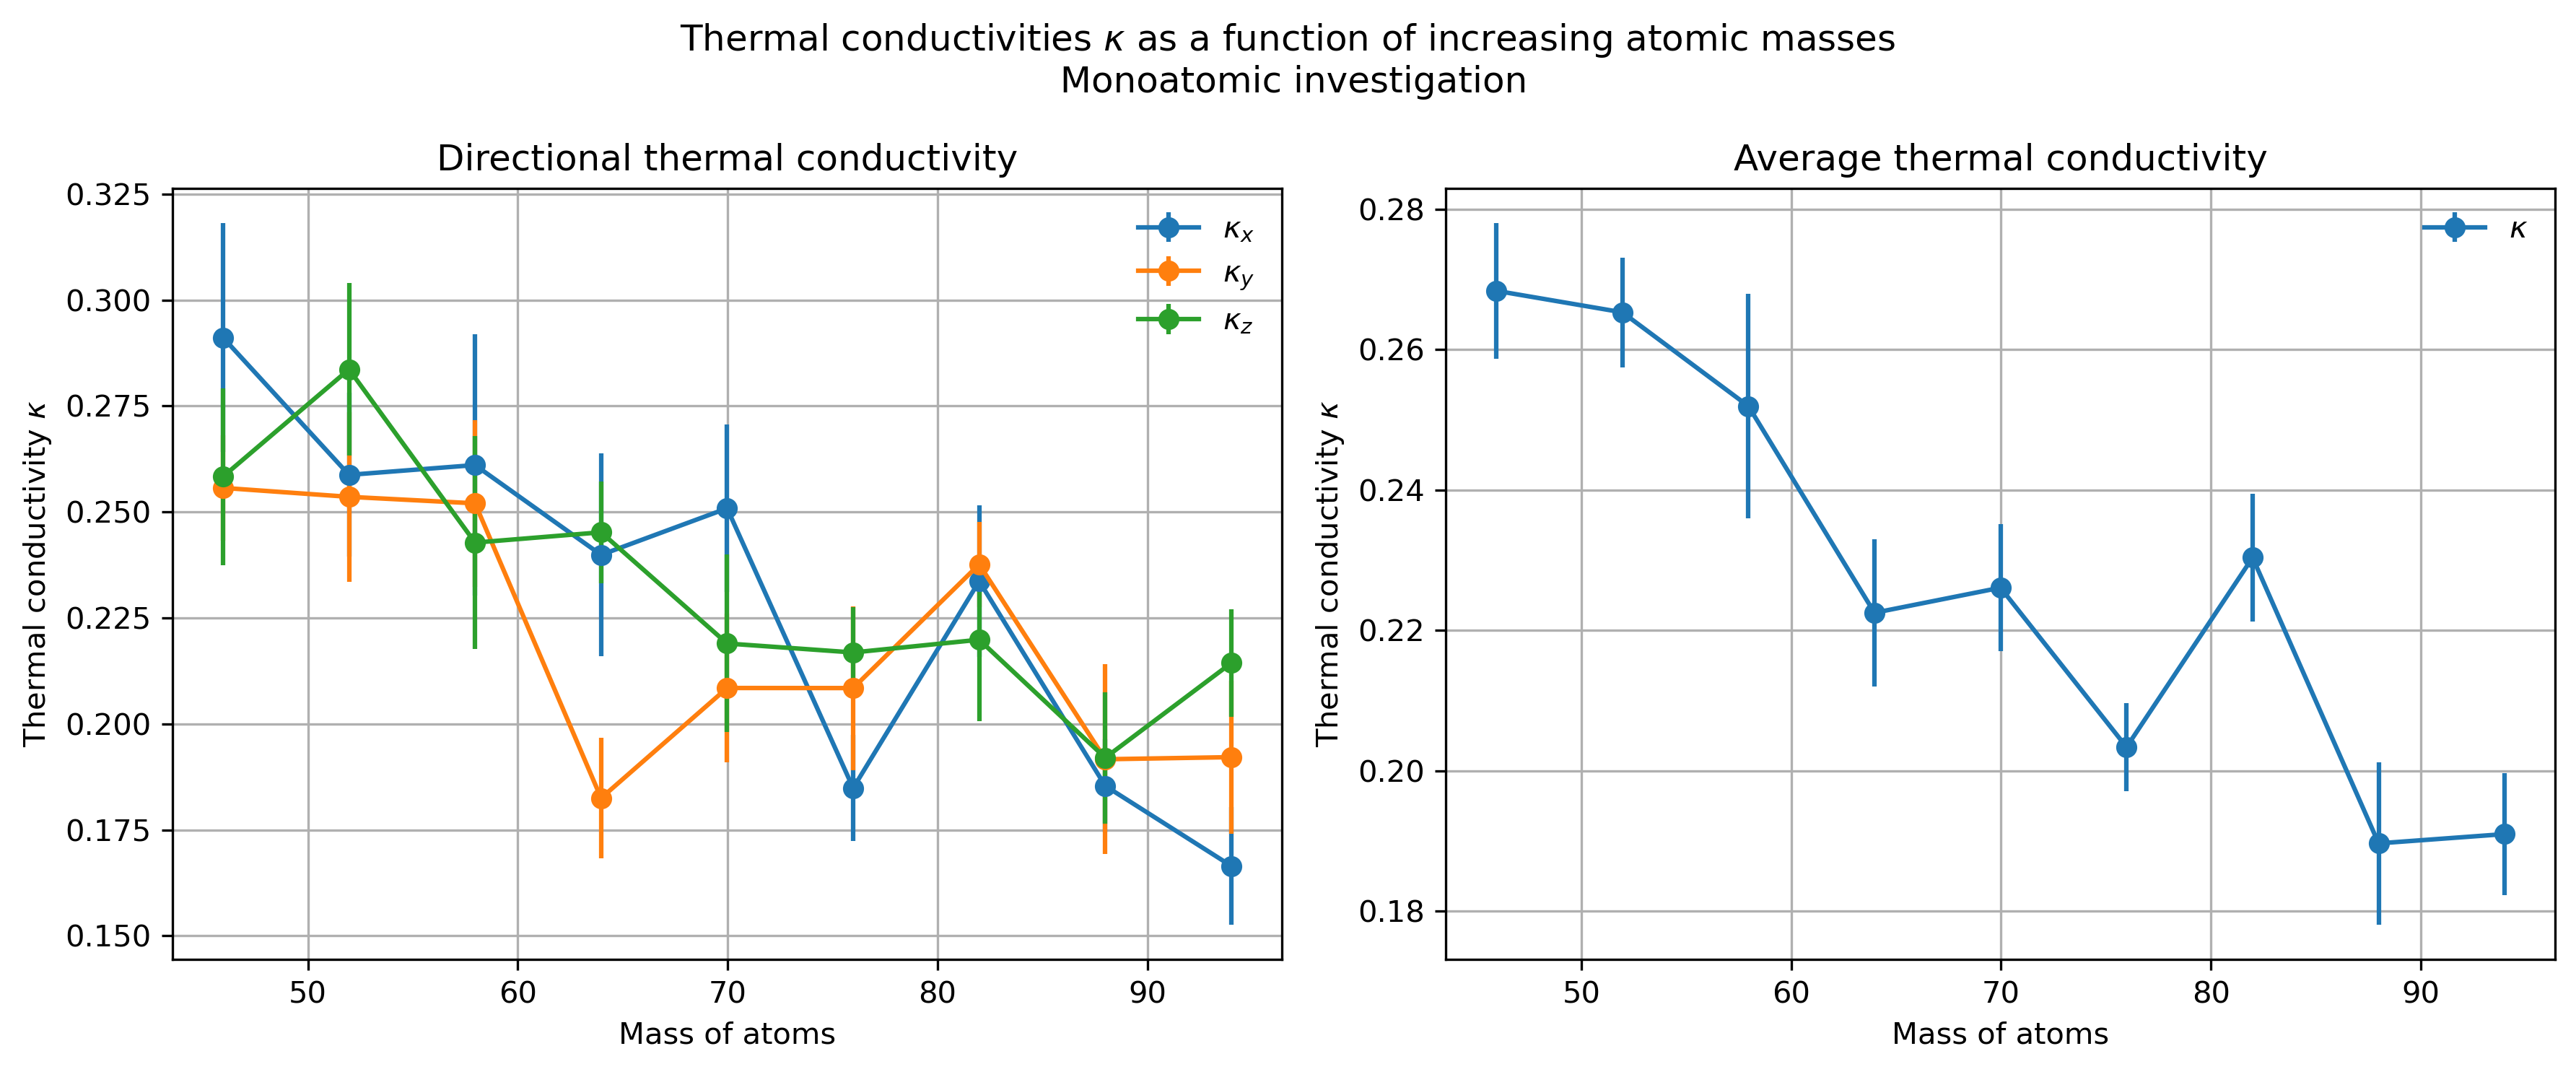

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot directional conductivities
ax1.errorbar(avg_masses, kx_averages, yerr=kx_errors, fmt='o-', label=r"$\kappa_x$")
ax1.errorbar(avg_masses, ky_averages, yerr=ky_errors, fmt='o-', label=r"$\kappa_y$")
ax1.errorbar(avg_masses, kz_averages, yerr=kz_errors, fmt='o-', label=r"$\kappa_z$")
ax1.grid()
ax1.set_xlabel("Mass of atoms"); ax1.set_ylabel("Thermal conductivity $\kappa$")
ax1.set_title("Directional thermal conductivity")
ax1.legend()

# Plot average conductivities
ax2.errorbar(avg_masses, k_averages, yerr=k_errors, fmt='o-', label=r"$\kappa$")
ax2.grid()
ax2.set_xlabel("Mass of atoms"); ax2.set_ylabel("Thermal conductivity $\kappa$")
ax2.set_title("Average thermal conductivity")
ax2.legend()

plt.suptitle("Thermal conductivities $\kappa$ as a function of increasing atomic masses \n Monoatomic investigation")
plt.tight_layout()

Matrix condition number: 1.0
Reduced chi^2 statistic: 1.641053603069221, with p value 0.1075065136324509


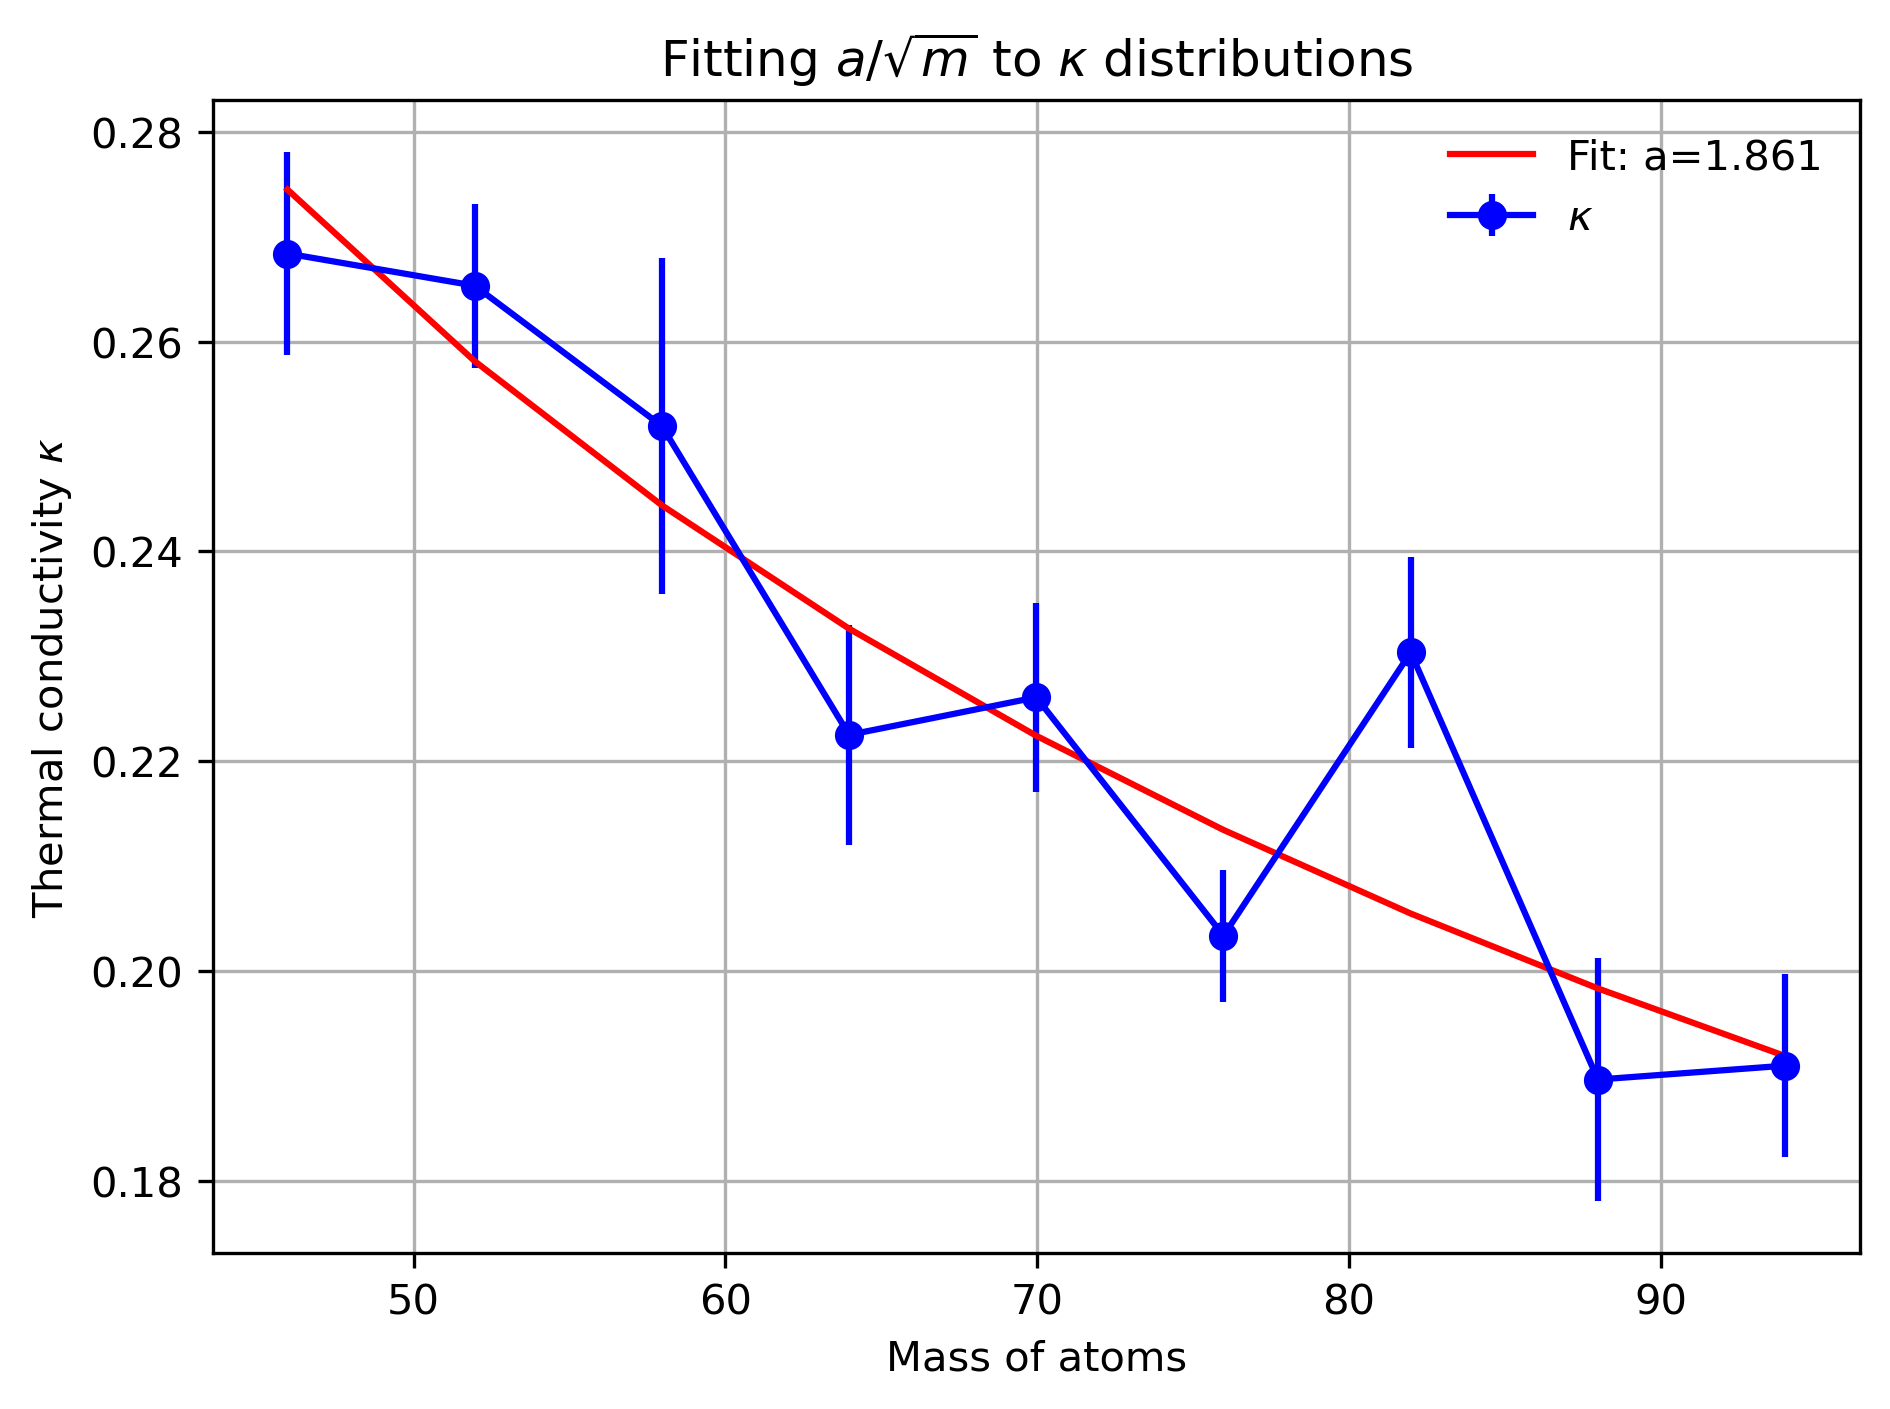

In [40]:
from scipy.optimize import curve_fit
from scipy import stats
popt, pcov = curve_fit(sqrtm, avg_masses, k_averages, sigma=k_errors, absolute_sigma=True)
plt.errorbar(avg_masses, k_averages, yerr=k_errors, fmt='bo-', label="$\kappa$")
plt.plot(avg_masses, sqrtm(avg_masses, *popt), 'r-',
         label='Fit: a=%5.3f' % tuple(popt))
plt.xlabel("Mass of atoms"); plt.ylabel("Thermal conductivity $\kappa$")
plt.title(r"Fitting $a / \sqrt{m}$ to $\kappa$ distributions"); plt.legend(); plt.grid(); plt.tight_layout()

print(f"Matrix condition number: {np.linalg.cond(pcov)}")
chi2_red, p = goodness_of_fit(avg_masses, k_averages, k_errors, popt, sqrtm)
print(f"Reduced chi^2 statistic: {chi2_red}, with p value {p}")

For a monoatomic investigation with the same average masses as last time (i.e. no random layering) we see that we get something much closer to a 1/sqrtm dependence. This suggests that the random layering we have introduced impacts the thermal conductivity in such a way so that it is no longer proportional to 1/sqrtm, but it's actually prop to a different power of m.